**Avant de débuter ce TP** :

1. **Changez le type d'exécution sur Google Colab** : `Exécution > Modifiez le type d'exécution > T4 GPU`
2. **Installez les paquets ci-dessous** :

In [ ]:
! pip install lightning torchmetrics torchinfo

# Introduction à PyTorch et PyTorch-Lightning

Il existe de nombreuses bibliothèques et langages de programmation pour pratiquer de l'apprentissage profond. Au cours de ces travaux pratiques, nous utiliserons le langage de programmation Python, ainsi que le paquet [PyTorch](https://pytorch.org) et d'autres paquets de cet écosystème.

L'objectif de ce Jupyter notebook est de vous fournir les bases pour débuter avec la bibliothèque Pytorch. À la fin de ce notebook, vous devez être capables de :
* **travailler avec des tenseurs**,
* **indiquer comment accéder aux données pour entraîner et évaluer un modèle**,
* **construire un réseau de neurones artificiels**, et
* **entraîner et évaluer votre modèle**.

Le contenu de ce notebook est basé sur les [tutoriels](https://pytorch.org/tutorials/) disponibles sur le site de Pytorch.

## Tenseurs

Les tenseurs PyTorch suivent une structure de données spécialisée et sont très similaires aux tableaux NumPy. Les tenseurs sont utilisés pour modéliser les entrées et les sorties d'un modèle, ainsi que les paramètres du modèle.

Les tenseurs PyTorch sont similaires aux tableaux NumPy, une différence majeure étant que les tenseurs peuvent être exécutés sur des cartes graphiques (*graphical processing units* ou GPUs).
En fait, les tenseurs PyTorch et les tableaux NumPy peuvent même partager le même espace mémoire, d'où l'absence de devoir copier les données.
Les tenseurs sont également optimisés pour la [dérivation automatique](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).
Si vous êtes familiers avec les tableaux NumPy, vous le serez rapidement également avec les tenseurs PyTorch.

In [2]:
import torch
import numpy as np

### Initialiser un tenseur

In [3]:
# Directement à partir de données "Python"
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
# À partir d'un tableau NumPy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [5]:
# À partir d'un autre tenseur
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [6]:
# Avec des valeurs aléatoires ou une seule et unique valeur
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tenseur aléatoire : \n {rand_tensor} \n")
print(f"Tenseur avec que des uns: \n {ones_tensor} \n")
print(f"Tenseur avec que des zéros : \n {zeros_tensor}")

Tenseur aléatoire : 
 tensor([[3.1592e-01, 8.2757e-01, 8.5807e-04],
        [1.3030e-01, 5.9221e-01, 9.9684e-01]]) 

Tenseur avec que des uns: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tenseur avec que des zéros : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributs d'un tenseur

Les attributs d'un tenseur décrivent ses caractéristiques telles que sa forme, son type de données ou encore sur quel type d'appareil il est sauvegardé.

In [7]:
tensor = torch.rand(3, 4)

print(f"Forme du tenseur : {tensor.shape}")
print(f"Type de données du tenseur : {tensor.dtype}")
print(f"Appareil sur lequel le tenseur est sauvegardé : {tensor.device}")

Forme du tenseur : torch.Size([3, 4])
Type de données du tenseur : torch.float32
Appareil sur lequel le tenseur est sauvegardé : cpu


**À noter que le type de données par défaut d'un tenseur est `float32`, alors que le type par défaut d'un tableau NumPy est `float64`. PyTorch impose que tous les tenseurs aient le même type de données pour effectuer des opérations entre eux.**

Vous pouvez changer le type de données d'un tenseur avec la méthode `to()` :

In [8]:
x_np.to(dtype=torch.float32)

tensor([[1., 2.],
        [3., 4.]])

### Opérations sur des tenseurs

De nombreuses opérations, telles que l'arithmétique, l'algèbre linéaire et des opérations matricielles (telles que la transposée, l'indexation ou encore les coupes) sont détaillées dans la [documentation](https://pytorch.org/docs/stable/torch.html).

Chacune de ces opérations peut être exécutée sur GPU (en général plus rapidement que sur CPU).
Sur Google Colab, changez le type d'exécution (CPU ou GPU) relance le noyau, c'est-à-dire qu'il faut exécuter à nouveau tout le code précédemment exécuté.
**C'est pourquoi la première instruction de ce notebook, ainsi que de de tous les autres notebooks, est de changer le type d'exécution et de choisir GPU au lieu de CPU.**
Les TPUs (pour [*Tensor Processing Units*](https://en.wikipedia.org/wiki/Tensor_Processing_Unit)) sont d'autres accélérateurs matériels, développés par Google, mais nous ne les utiliserons pas. 

Par défaut, les tenseurs sont créés sur le CPU. Il faut explicitement déplacer les tenseurs sur le GPU en utilisant la méthode `to()` (après avoir vérifié la disponibilité de GPUs). Gardez en tête que copier de grands tenseurs sur d'autres appareils peut être coûteux à la fois en terme de temps et de mémoire.

In [9]:
# Exemple : déplacer un tenseur sur un GPU s'il y en a un de disponible
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [10]:
# Opérations d'indexation et de coupes (similaires aux tableaux NumPy)
tensor = torch.ones(4, 4)
print(f"Première ligne : {tensor[0]}")
print(f"Première colonne : {tensor[:, 0]}")
print(f"Dernière colonne : {tensor[..., -1]}")
tensor[:, 1] = 0  # Modification de la deuxième colonne
print(tensor)

Première ligne : tensor([1., 1., 1., 1.])
Première colonne : tensor([1., 1., 1., 1.])
Dernière colonne : tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# Concatenation de tenseurs (le long d'une dimension donnée)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [12]:
# Opérations arithmétiques

## Trois manières d'effectuer la multiplication matricielle
y1 = tensor @ tensor.T

y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

## Trois manières d'effectuer la multiplication élément par élément
z1 = tensor * tensor

z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [13]:
# Tenseur à un seul élément et récupération de la valeur en un type natif de Python.
agg = tensor.sum()
print(agg, type(agg))

agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


## Jeu de données et chargeurs de données

L'accès aux données est un élément essentiel pour pouvoir entraîner des modèles. PyTorch met à disposition deux outils qui permettent de faciliter l'accès aux données : [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) et [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Ces outils permettent de travailler à la fois sur des jeux de données publics et très couramment utilisés, mais aussi sur son propre de jeu de données.

La classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) permet de définir un jeu de données, notamment sa taille (c'est-à-dire son nombre d'observations) et comment accéder à n'importe quelle observation.

La classe [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) permet de définir, pour un jeu de données, un chargeur de données, notamment comment accéder à plusieurs observations à la fois, s'il faut mélanger ou non l'ordre des observations, etc. Le chargeur de données est l'outil utilisé pour l'entraînement et l'évaluation des modèles.

### Chargement d'un jeu de données couramment utilisé

Certains jeux de données couramment utilisés peuvent être facilement téléchargés grâce à des outils fournis dans d'autres bibliothèques de l'écosystème PyTorch telles que [TorchVision](https://pytorch.org/vision/stable/index.html), [TorchText](https://pytorch.org/text/stable/index.html) et [TorchAudio](https://pytorch.org/audio/stable/index.html).

Dans ce tutoriel, nous allons télécharger et utiliser le jeu de données [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST), consistué d'images de mode de taille `28 x 28`. Le jeu d'entraînement est composé de 60 000 images, tandis que le jeu d'évaluation est composé de 10 000 images. Le jeu de données est disponible via la classe [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST).

In [14]:
from torchvision import datasets
from torchvision.transforms import ToTensor


dataset_train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

dataset_val = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:06<00:00, 4.18MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 1.47MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:00<00:00, 5.16MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


### Itération et visualisation du jeu de données

Une instance de la classe `Dataset` est indexable, comme une liste Python : `training_data[index]`.

Comme nos observations sont des images, nous allons visualiser certaines observations à l'aide de la bibliothèque `matplotlib`.

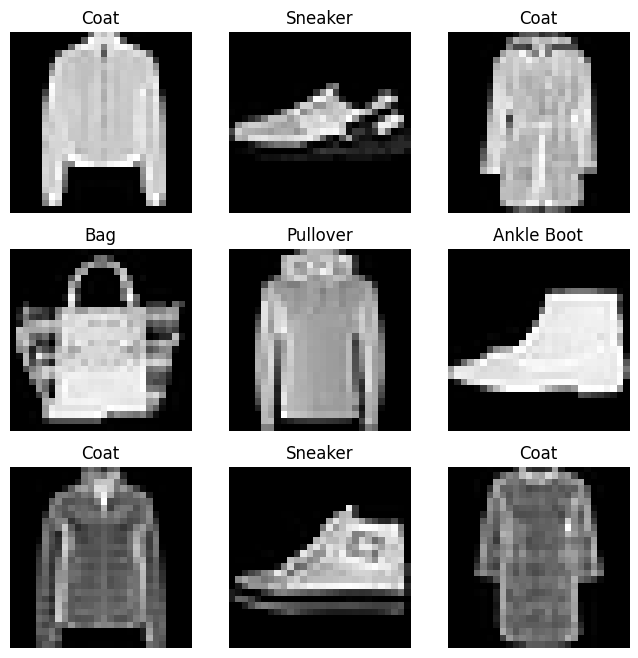

In [15]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


# Affichage de 9 observations du jeu d'entraînement choisies aléatoirement
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_train), size=(1,)).item()
    img, label = dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Travailler avec son propre jeu de données

#### Cas général

En pratique, vous ne travaillerez pas sur un jeu de données public couramment utilisé mais sur votre propre jeu de données. Il reste néanmoins possible d'utiliser certains outils mis à disposition, à condition de respecter certaines contraintes.

Si vous travaillez sur votre propre jeu de données, il va falloir définir une classe héritant de la classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) qui définit les trois méthodes suivantes :
* `__len__()` : cette méthode renvoie le nombre d'observations du jeu de données.
* `__getitem__()` : cette méthode charge et renvoie la n-ième observation du jeu de données (où n est un argument de la méthode)
* `__init__()` : cette méthode définit toutes les informations nécessaires pour l'implémentation des deux autres méthodes.

Vous trouverez [ici](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) un exemple tiré de la documentation de PyTorch pour un jeu de données constitué d'images. Cet exemple est copié-collé ci-dessous. **Ce n'est qu'un exemple, il ne faut pas le copier-coller sans le comprendre.**


```python
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
```

#### Cas avec des tenseurs déjà chargés

Quand vos données sont déjà chargées dans des tenseurs, une classe pratique est [`torch.utils.data.TensorDataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset).
Il faut que la première dimension de chaque tenseur soit la dimension des observations.
Ensuite, il suffit de fournir les tenseurs en arguments du constructeur de cette classe : chaque observation sera récupérée en indexant les tenseurs le long de la première dimension.

### Préparer les données pour l'entraînement avec le DataLoader

La classe `Dataset` permet de récupérer n'importe quelle observation d'un jeu de données. Lors de l'entraînement d'un modèle, on veut en général accéder à plusieurs observations à la fois (en mini-lots) et mélanger le jeu de données à chaque époque pour réduire le surapprentissage.

Pour ce faire, on utilise la classe [`torch.utils.data.Dataloader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Son premier argument, obligatoire, est le jeu de données, c'est-à-dire l'instance de la classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).
Les autres arguments importants, optionnels, sont la taille du lot (`batch_size`) et le fait de mélanger ou non le jeu de données (`shuffle`). Mélanger le jeu de données pendant l'entraînement peut être utile pour éviter le surapprentissage, mais c'est inutile pour l'évaluation.

In [16]:
from torch.utils.data import DataLoader

dataloader_train = DataLoader(dataset_train, batch_size=100, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=100)

### Itération à travers le `DataLoader`

On a chargé le jeu de données et on peut itérer à travers le jeu de données. En utilisant les fonctions natives [`iter()`](https://docs.python.org/fr/3/library/functions.html#iter) et [`next()`](https://docs.python.org/fr/3/library/functions.html#next), on peut accéder au prochain lot d'observations :

Taille du tenseur contenant les images du lot d'observations : torch.Size([100, 1, 28, 28])
Taille du tenseur contenant les labels du lot d'observations : torch.Size([100])


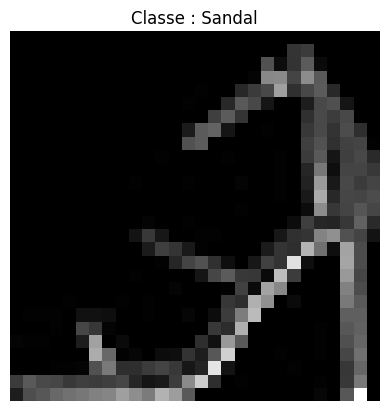

In [17]:
# Get the next mini-batch of samples
train_features, train_labels = next(iter(dataloader_train))
print(f"Taille du tenseur contenant les images du lot d'observations : {train_features.size()}")
print(f"Taille du tenseur contenant les labels du lot d'observations : {train_labels.size()}")

# Display the image and the label of the first sample in the mini-batch
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(f"Classe : {labels_map[label.item()]}")
plt.axis('off')
plt.show()

## Construire, entraîner et évaluer un réseau de neurones artificiels avec PyTorch

### Construction d'un réseau de neurones avec PyTorch

Pour construire un réseau de neurones avec PyTorch, il y a quelques règles simples à respecter :

* Il faut définir une classe héritant de la classe [`torch.nn.Module()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
* La classe doit contenir au moins les deux méthodes suivantes :

    + Le constructeur `__init__()`, où on appelle toujours le constructeur de la classe mère et où on initialise toutes les couches (et où on peut également définir les fonctions d'activation).
    + La méthode `forward()` qui définit la passe avant, c'est-à-dire comment passer de l'entrée à la sortie.

Tous les éléments nécessaires pour définir un réseau de neurones se trouvent dans le module [`torch.nn`](https://pytorch.org/docs/stable/nn.html), en particulier toutes les couches et fonctions d'activation.

Dans l'exemple ci-dessous, on définit un réseau de neurones avec l'architecture séquentielle suivante :
1. une couche d'aplatissement, pour transformer une image en un vecteur,
2. une première couche linéaire avec $28 \times 28 = 784$ entrées et $512$ sorties,
3. la fonction d'activation ReLU,
4. une deuxième couche linéaire avec $512$ entrées et $512$ sorties,
5. la fonction d'activation ReLU,
6. une troisième couche linéaire avec $512$ entrées et $10$ sorties.

Vous remarquerez qu'on n'utilise pas la fonction d'activation $\text{softmax}$ pour transformer le dernier vecteur de 10 réels en un vecteur de probabilités. En effet, la fonction $\text{softmax}$ utilise la fonction exponentielle et la fonction de coût que nous allons utiliser, l'entropie croisée, utilise le logarithme des probabilités. Il est donc plus simple (et c'est également numériquement plus stable) de travailler directement avec les **logits** plutôt que les probabilités.

In [18]:
class NeuralNetworkPyTorch(torch.nn.Module):
    def __init__(self):
        # On appelle toujours le constructeur de la classe mère
        super().__init__()
        
        # Convertit un tenseur multidimensionnel en un tenseur unidimensionnel
        self.flatten = torch.nn.Flatten()
        
        # Première couche linéaire
        self.linear1 = torch.nn.Linear(28 * 28, 512)
        
        # Première fonction d'activation
        self.relu1 = torch.nn.ReLU()
        
        # Deuxième couche linéaire
        self.linear2 = torch.nn.Linear(512, 512)
        
        # Deuxième fonction d'activation
        self.relu2 = torch.nn.ReLU()

        # Troisième couche linéaire
        self.linear3 = torch.nn.Linear(512, 10)

    def forward(self, x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.relu1(y)
        y = self.linear2(y)
        y = self.relu2(y)
        y = self.linear3(y)
        return y

Un inconvénient évident de l'approche est qu'on est obligés d'appeler chaque couche et chaque fonction d'activation une par une. C'est non seulement énervant même pour une architecture aussi petite, mais c'est en plus un risque d'erreur non négligeable, surtout avec un réseau plus grand. Heureusement, dans le cas où une partie de l'architecture est séquentielle, on peut utiliser la classe [`torch.nn.Sequential()`]() pour indiquer la liste des couches et fonctions d'activation de la séquence. Quand on appele ensuite cet objet, la séquence est parcourue dans l'ordre fourni et on récupère simplement la sortie de la séquence.

Le code ci-dessous illustre la simplification de la méthode `forward()` en utilisant cet outil.

In [19]:
class NeuralNetworkPyTorchSimpler(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )

    def forward(self, x):
        return self.sequential(x)

On peut visualiser l'architecture de notre réseau de neurones en utilisant la fonction [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo?tab=readme-ov-file#documentation). En lui fournissant également la taille de l'entrée (en incluant la dimension pour le lot), on peut facilement visualiser la taille de la sortie de chaque couche.

In [20]:
from torchinfo import summary

model = NeuralNetworkPyTorchSimpler()
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetworkPyTorchSimpler              [64, 10]                  --
├─Sequential: 1-1                        [64, 10]                  --
│    └─Flatten: 2-1                      [64, 784]                 --
│    └─Linear: 2-2                       [64, 512]                 401,920
│    └─ReLU: 2-3                         [64, 512]                 --
│    └─Linear: 2-4                       [64, 512]                 262,656
│    └─ReLU: 2-5                         [64, 512]                 --
│    └─Linear: 2-6                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

### Appareil (*device*) sur lequel travailler

Par défaut, tous les tenseurs définis sont mis sur les **unités centrales de traitement** (CPU pour *central processing units* en anglais). Cependant, il existe d'autres unités, telles que les **unités de traitement graphique** (GPU pour *graphical processing units* en anglais), qui sont bien plus rapides pour effectuer certaines opérations mathématiques, notamment celles nécessaires en apprentissage profond telles que le calcul matriciel.

**En gros, si vous utilisez des GPUs au lieu de CPUs, l'exécution des passes avant et arrière sera, *en général*, bien plus rapide : l'entraînement et l'inférence seront donc, *en général*, bien plus rapides.**

Sur Google Colab, vous pouvez modifier les ressources auxquelles vous avez accès en allant dans `Exécution > Modifier le type d'exécution` et en cliquant sur `T4 GPU` au lieu de `CPU`.
Modifier l'accélérateur matériel redémarre votre noyau (c'est-à-dire que vous perdez toutes les variables que aviez définies et qu'il faut rexécuter le code depuis le début).
**Il est donc important de choisir le type d'accélérateur matériel au tout début afin de ne pas perdre le travail déjà effectué.**

**CUDA** (pour *Compute Unified Device Architecture*) est une technologie permettant d'exécuter des calculs sur un GPU à la place d'un CPU.
C'est ce terme qui est utilisé dans la bibliothèque PyTorch.
Pour savour (ou vérifier) si vous avez accès à un GPU, on utilise la fonction [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html) :

In [21]:
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


**Il est nécessaire de tout mettre sur le même appareil**. Par exemple, si on souhaite utiliser un GPU, alors il faut mettre le modèle sur le GPU mais aussi chaque lot d'observations sur le GPU pendant l'entraînement et l'inférence. On commence donc par mettre le modèle sur le GPU.

In [22]:
model = model.to(device)

**Pour effectuer la passe avant du modèle, on n'utilise pas directement pas la méthode `forward()` mais on appelle directement le modèle** (appeler le modèle effectue des opérations supplémentaires).
Par exemple, avec le code ci-dessous :
1. On définit ci-dessous une image où tous les pixels sont aléatoires et on la met sur le bon appareil.
2. On effectue la passe avant pour obtenir les logits.
3. On obtient l'indice de la classe prédite qui correspond à l'indice du logit maximal.
4. On affiche le nom de la classe prédite.

In [23]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
y_pred = logits.argmax(1)
print(f"Classe prédite : {labels_map[y_pred.item()]}")
del X, logits, y_pred

Classe prédite : Coat


### Entraînement et évaluation

En utilisant uniquement le paquet PyTorch, il est nécessaire d'écrire soi-même le code pour l'entraînement et l'évaluation d'un modèle. Néanmoins, on a déjà défini presque tous les éléments nécessaires pour l'entraînement du modèle. Il nous reste à définir la fonction de coût, l'algorithme d'optimisation ainsi que certains hyperparamètres tels que le nombre d'époques.

Le module [`torch.nn`](https://pytorch.org/docs/stable/nn.html) met à disposition les différentes [fonctions de perte](https://pytorch.org/docs/stable/nn.html#loss-functions) déjà implémentées dans PyTorch. Pour les algorithmes d'optimisation, il faut utiliser le module [`torch.optim`](https://pytorch.org/docs/stable/optim.html).

* **Fonction de coût** : comme nous travaillons sur un problème de classification en classes multiples, nous allons utiliser l'*entropie croisée* : [`torch.nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
* **Algorithme d'optimisation** : nous allons utiliser l'algorithme *Adam*, qui est en général un bon algorithme par défaut : [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

À noter qu'on a déjà définit des hyperparamètres sans forcément s'en rendre compte, par exemple **la taille des lots** (`batch_size`) sur le jeu d'entraînement à travers le *dataloader* pour ce jeu. On utilise ici également les valeurs par défaut des hyperparamètres pour l'algorithme Adam, mais on pourrait les changer.

En utilisant un nombre d'époques fixe, la procédure générale d'entraînement d'un modèle est la suivante :
```
Pour chaque époque
    Pour chaque lot du jeu d'entraînement
        [Optionnel] Mettre les données sur le bon appareil (GPU)
        Effectuer la passe avant et calculer la fonction de coût
        Effectuer la passe arrière (calculer les gradients)
        Effectuer une étape d'optimisation (misee à jour des paramètres entraînables du modèle)
```

L'optimisation se déroule dans trois étapes de la boucle imbriquée :
* La méthode `zero_grad()` de l'algorithme d'optimisation permet de réinitialiser les gradients des paramètres du modèle. Par défaut, les gradients s'accumulent au fil des itérations. Pour éviter cette accumulation, il faut explicitement les réinitialiser à zéro au début de chaque itération.
* La passe arrière s'effectue grâce à la méthode `backward()` de la fonction de perte. Ici, PyTorch calcule le gradient de la fonction de coût par rapport à chaque paramètre entraînable.
* La mise à jour des paramètres entraînables du modèle s'effectue grâce à la méthode `step()` de l'algorithme d'optimisation, à partir des gradients calculés durant la passe arrière.

Le code ci-dessous définit trois fonctions :
* La fonction `train_loop()` correspond à l'entraînement du modèle pendant une époque sur le jeu d'entraînement.
* La fonction `eval_loop()` correspond à l'évaluation d'un modèle sur un jeu de données.
* La fonction `train()` effectue l'entraînement complet du modèle.

In [24]:
def train_loop(dataloader, model, loss_function, optimizer, device, verbose=False):
    # Met le modèle en mode entraînement.
    # C'est une bonne pratique à avoir car certaines couches ne se comportent
    # pas de la même manière durant l'entraînement et l'inférence.
    # Ici, cela n'a aucun impact car toutes les couches se comportent de la même manière.
    model.train()

    loss_mean, accuracy_mean = 0.0, 0.0

    # Pour chaque lot
    for batch, (X, y) in enumerate(dataloader):

        # Réinitialise les gradients à zéro
        optimizer.zero_grad()

        # Met le lot d'observations sur le bon appareil
        X = X.to(device)
        y = y.to(device)

        # Effectue la passe avant et calcule la fonction de coût
        pred = model(X)
        loss = loss_function(pred, y)
        accuracy = (pred.argmax(1) == y).to(torch.float).mean().item()

        loss_mean += loss.item()
        accuracy_mean += accuracy

        # Effectue la passe arrière et met à jour les paramètres du modèle
        loss.backward()
        optimizer.step()

        # Affiche la valeur de la fonction de coût pour certains lots
        if verbose and (batch % (len(dataloader) // 10) == 0):
            loss = loss.item()
            print(
                f"Fonction de coût = {loss: >7f} ; "
                f"Précision = {accuracy:06.2%} "
                f"[{batch: >3d} / {len(dataloader): >3d}]"
            )

    loss_mean /= len(dataloader)
    accuracy_mean /= len(dataloader)
    
    return loss_mean, accuracy_mean


def eval_loop(dataloader, model, loss_function, device):

    # Met le modèle en mode évaluation.
    # C'est une bonne pratique à avoir car certaines couches ne se comportent
    # pas de la même manière durant l'entraînement et l'inférence.
    # Ici, cela n'a aucun impact car toutes les couches se comportent de la même manière.
    model.eval()
    
    # Définit des variables nécessaires pour l'évaluation du modèle
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss, correct = 0.0, 0.0

    # Évaluer le modèle dans un contexte `with torch.no_grad()` assure qu'aucun gradient
    # n'est calculé pendant l'évaluation, ce qui évite des calculs inutiles.
    with torch.no_grad():
        
        # Pour chaque lot
        for X, y in dataloader:
            
            # Met le lot d'observations sur le bon appareil
            X = X.to(device)
            y = y.to(device)
            
            # Effectue la passe avant
            pred = model(X)
            
            # Calcule la fonction de coût et le nombre de bonnes prédictions
            loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calcule la fonction de coût moyenne et la proportion de bonnes prédictions
    loss /= num_batches
    correct /= size
    return loss, correct


def train(model, dataloader_train, dataloader_val, loss_function, optimizer, n_epochs, device, verbose=True):
    for epoch in range(n_epochs):
        string = f"Époque {epoch + 1:{len(str(n_epochs))}d} / {n_epochs}"
        print(f"{string}\n{'-' * len(string)}")
        print(" Jeu d'entraînement ".center(54 + 2 * len(str(len(dataloader_train))) , '#'))

        # Training loop
        loss_train, accuracy_train = train_loop(
            dataloader_train, model, loss_function, optimizer, device, verbose
        )
        print(f"Fonction de coût = {loss_train: >7f} ; Précision = {accuracy_train:06.2%} [Moyenne]")

        # Evaluation loop
        loss_val, accuracy_val = eval_loop(dataloader_val, model, loss_function, device)
        print(" Jeu de validation ".center(54 + 2 * len(str(len(dataloader_train))), '#'))
        print(f"Fonction de coût = {loss_val: >8f} ; Précision = {(accuracy_val):06.2%}\n")
              

    print("Entraînement terminé !")

On utilise la fonction `train()` pour entraîner le modèle pendant 5 époques.

In [25]:
train(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_val=dataloader_val,
    loss_function=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(model.parameters()),
    n_epochs=5,
    device=device,
    verbose=True
)

Époque 1 / 5
------------
#################### Jeu d'entraînement ####################
Fonction de coût = 2.301971 ; Précision = 10.00% [  0 / 600]
Fonction de coût = 0.794105 ; Précision = 76.00% [ 60 / 600]
Fonction de coût = 0.622964 ; Précision = 75.00% [120 / 600]
Fonction de coût = 0.493478 ; Précision = 82.00% [180 / 600]
Fonction de coût = 0.455837 ; Précision = 83.00% [240 / 600]
Fonction de coût = 0.476874 ; Précision = 86.00% [300 / 600]
Fonction de coût = 0.455968 ; Précision = 81.00% [360 / 600]
Fonction de coût = 0.324277 ; Précision = 89.00% [420 / 600]
Fonction de coût = 0.379831 ; Précision = 87.00% [480 / 600]
Fonction de coût = 0.402809 ; Précision = 84.00% [540 / 600]
Fonction de coût = 0.505225 ; Précision = 81.66% [Moyenne]
#################### Jeu de validation #####################
Fonction de coût = 0.407442 ; Précision = 85.42%

Époque 2 / 5
------------
#################### Jeu d'entraînement ####################
Fonction de coût = 0.317147 ; Précision = 85.0

Comme vous pouvez le constater, entraîner un modèle avec PyTorch nécessite d'écrire pas mal de code.
Néanmoins, on se rend compte que l'on écrit très souvent des bouts de code quasiment identiques sur différents projets, surtout lorsqu'on effectue des choses classiques.
On va donc voir une autre bibliothèque qui va nous permettre de ne pas réécrire toujours le même code à chaque fois.

## Construire, entraîner et évaluer un réseau de neurones artificiels avec PyTorch-Lightning

### Les bases

Une caractéristique de PyTorch est qu'il s'agit d'une bibliothèque relativement *low-level* : certaines fonctionnalités doivent être implémentées par l'utilisateur à partir des outils mis à disposition. Par exemple, pour l'entraînement, il faut à chaque fois écrire le code complet de la procédure.
À l'inverse, dans des bibliothèques comme [scikit-learn](https://scikit-learn.org) en Python ou [caret](https://cran.r-project.org/web/packages/caret/index.html) en R, vous n'avez besoin que d'appeler la méthode `.fit()` ou la fonction `train()` pour effectuer l'entraînement.
Certains hyperparamètres vous permettent d'effectuer des modifications sur comment est entraîné le modèle, mais vous n'avez pas à implémenter vous-même l'entraînement.

Cet aspect *low-level* de PyTorch peut être pratique pour des travaux de recherche parce qu'on souhaite en général avoir accès à toutes les fonctionnalités pour pouvoir effectuer des modifications si nécessaires.
Cela l'est moins quand on veut juste utiliser une version classique de l'entraînement.

Pour ce faire, nous allons également utiliser une autre bilbiothèque Python appelée [PyTorch Lightning](https://lightning.ai/pytorch-lightning), qui va nous permettre d'éviter d'écrire une partie du code pour l'entraînement et l'évaluation du modèle.

**Tout se fait dans une seule classe, définie par l'utilisateur, qui doit respecter les conventions suivantes** :
* La classe hérite de la classe [`lightning.LightningModule()`](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#lightningmodule).
* Le constructeur fait appel au constructeur de la classe mère.
* **Méthode ``__init__()``** : Toutes les couches avec des paramètres entraînables sont initialisées dans le constructeur. Pour éviter de se demander, en cas de doute, si une couche a des paramètres entraînables ou non, autant initialiser toutes les couches et toutes les fonctions d'activation dans le constructeur. Toutes les couches et fonctions d'activation que nous utiliserons sont définies dans le sous-module [`torch.nn`](https://pytorch.org/docs/stable/nn.html).
* **Méthode ``forward()``** : Elle définit comment effectuer une passe avant, c'est-à-dire comment passer de l'entrée à la sortie du réseaux de neurones. Cependant, pour effectuer une passe avant, on n'appelle jamais directement la méthode `forward()` mais on appelle directement l'objet : `self()`.
* **Méthode ``training_step()``** : elle définit comment effectuer une étape d'entraînement, c'est-à-dire comment passer d'un lot (*batch*) d'observations à la fonction de coût correspondant à ce lot d'observations.
* **Méthode ``configure_optimizers()``** : elle définit l'algorithme d'optimisation à utiliser. Il doit s'agir d'un des algorithmes implémentés dans le sous-module [`torch.optim`](https://pytorch.org/docs/stable/optim.html#algorithms).

Le code ci-dessous définit un perceptron multicouche à deux couches cachées (où les images sont d'abord transformées en vecteurs grâce à la couche `nn.Flatten()`), entraîné par l'algorithme d'optimisation Adam avec l'entropie croisée comme fonction de coût :

In [26]:
import lightning as L


class NeuralNetworkLightning(L.LightningModule):  # La classe hérite de la classe lightning.LightningModule
    def __init__(self):
        """Constructeur.

        Dans le constructeur, on exécute le constructeur de la clase mère et on définit
        toutes les couches et fonctions d'activation de notre réseau de neurones.
        """
        super().__init__()  # Toujours exécuter le constructeur de la classe mère

        # Initialisation de la séquence de couches et de fonctions d'activation
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )
        
        # Définition de la fonction de perte
        self.loss = torch.nn.CrossEntropyLoss()

    def forward(self, x):
        """Implémente la passe avant.

        L'argument x est un tenseur correspondant soit à l'entrée une seule
        observation soit aux entrées d'un lot d'observations.
        """
        return self.sequential(x)

    def training_step(self, batch):
        """Effectue une étape d'entraînement.

        Une étape consiste à passer d'un lot d'observations (l'argument batch)
        à l'évaluation de la fonction de coût pour ce lot d'observations.
        """
        X, y = batch  # X correspond aux images, y aux classes
        logits = self(X)  # Passe avant, qui renvoie les logits
        loss = self.loss(logits, y)  # Évaluation de la fonction de coût
        return loss

    def configure_optimizers(self):
        """Configure l'algorithme d'optimisation à utiliser."""
        optimizer = torch.optim.Adam(self.parameters())
        return optimizer

On peut toujours visualiser l'architecture de notre réseau de neurones en utilisant la fonction [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo?tab=readme-ov-file#documentation). En lui fournissant également la taille de l'entrée (en incluant la dimension pour le lot), on peut facilement visualiser la taille de la sortie de chaque couche.

In [27]:
from torchinfo import summary


model = NeuralNetworkLightning()
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetworkLightning                   [64, 10]                  --
├─Sequential: 1-1                        [64, 10]                  --
│    └─Flatten: 2-1                      [64, 784]                 --
│    └─Linear: 2-2                       [64, 512]                 401,920
│    └─ReLU: 2-3                         [64, 512]                 --
│    └─Linear: 2-4                       [64, 512]                 262,656
│    └─ReLU: 2-5                         [64, 512]                 --
│    └─Linear: 2-6                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

Il nous reste maintenant à définir une instance de la classe [`lightning.Trainer()`](https://lightning.ai/docs/pytorch/stable/common/trainer.html) pour définir des hyperparamètres de l'entraînement (comme par exemple le nombre maximum d'époques), puis d'utiliser la méthode `.fit()` pour entraîner notre modèle sur un jeu de données (défini par un *dataloader*).

In [28]:
trainer = L.Trainer(max_epochs=5)
trainer.fit(model=model, train_dataloaders=dataloader_train)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/johannfaouzi/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | sequential | Sequential 

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=5` reached.


On peut effectuer les remarques suivantes :

* On n'a pas besoin de réécrire tous les boucles `for` : PyTorch Lightning s'en occupe lui-même.

* Le code est mieux organisé : les différentes étapes sont définies à travers des méthodes spécifiques de la classe.

* On n'a pas besoin d'indiquer le type d'appareil (CPU ou GPU) sur lequel on souhaite travailler. C'est un des avantages de PyTorch Lightning : il s'occupe automatiquement de mettre le modèle et les données sur le GPU s'il y en a de disponible. C'est le comportement par défaut, il est bien sûr possible de le changer.

* Un dossier `lightning_logs` a été créé dans le répertoire courant. En effet, PyTorch Lightning sauvegarde par défaut certaines informations de l'entraînement. On peut bien entendu personnaliser ce qui est sauvegardé dans ces registres.

* Une barre indique la progression de l'entraînement, mais aucune statistique (fonction de perte, précision) n'est affichée pour suivre la *qualité* de l'entraînement.

Nous allons utiliser des réglages avancés de PyTorch Lightning pour combler ces manques. Le gain en termes de code sera donc plus limité que dans cette version initiale basique, mais les résultats obtenus seront plus lisibles et plus faciles à analyser.

### Réglages avancés

On a réussi à entraîner notre modèle pendant plusieurs époques, mais on n'a aucune information sur la qualité de l'entraînement :

* Est-ce que le modèle a convergé ?
* Quel est la valeur de la fonction de coût à la fin de l'entraînement ?
* À quelle performance peut-on s'attendre de la part de ce modèle entraîné ?

Heureusement, PyTorch Lightning est très flexible et nous permet de personnaliser l'entraînement, notamment pour **afficher** et **enregistrer** des informations pertinentes de l'entraînement. On va effectuer les modifications suivantes :

* On va rajouter une **étape de validation**, c'est-à-dire qu'à la fin de chaque époque, on va évaluer notre modèle sur un jeu de validation (différent du jeu d'entraînement). Cela nous permet d'évaluer notre modèle sur un jeu de données indépendant du jeu d'entraînement.
* On va **afficher davantage d'informations au cours de l'entraînement**, notamment la valeur de la fonction de coût pour certains lots d'observations à intervalle régulier. Cela nous permet de vérifier que la fonction de coût (en général) diminue bien au cours de l'entraînement et de détecter éventuellement du surapprentissage (si la fonction de coût est bien plus faible sur le jeu d'entraînement que le jeu de validation).
* On va supprimer les éventuels avertissements affichés par Lightning, qui s'affichent entre les informations que l'on a décidé d'afficher.
* Par défaut, Lightning enregistre des informations liées à l'entraînement dans un dossier `lightning_logs` pour être visualisées avec [TensorBoard](https://www.tensorflow.org/tensorboard?hl=fr). Nous allons utiliser un autre enregistreur, [`CSVLogger()`](https://lightning.ai/docs/pytorch/stable/extensions/generated/lightning.pytorch.loggers.CSVLogger.html), qui va enregistrer ces informations dans un fichier CSV que l'on pourra facilement lire pour visualiser les résultats.

Il est nécessaire d'utiliser les noms des méthodes spécifiques à chaque opération. Les nouvelles méthodes définies sont les suivantes :
* `validation_step()` : effectue une étape de validation.
* `test_step()` : effectue une étape d'évaluation.
* `on_train_start()` : exécutée au début de l'entraînement, on l'utilise ici pour afficher la version du modèle.
* `on_train_epoch_end()` : exécutée au début de chaque époque sur le jeu d'entraînement, on l'utilise ici pour afficher des informations à la fin de chaque époque.

Les époques sont exécutées en alternance sur le jeu d'entraînement et sur le jeu de validation, en commençant par le jeu d'entraînement.
La méthode `fit()` effectue donc les opérations suivantes :
* Époque 1 sur le jeu d'entraînement
* Époque 1 sur le jeu de validation
* Époque 2 sur le jeu d'entraînement
* Époque 2 sur le jeu de validation
* etc.

In [29]:
# Suppression des messages d'information affichés par PyTorch Lightning
import logging
logging.getLogger("lightning").setLevel(logging.ERROR)
logging.getLogger("lightning.pytorch.utilities.rank_zero").setLevel(logging.WARNING)
logging.getLogger("lightning.pytorch.accelerators.cuda").setLevel(logging.WARNING)

# Suppression des avertissements liés aux dataloaders
import warnings
warnings.filterwarnings("ignore", ".*does not have many workers.*")
warnings.filterwarnings("ignore", ".*Missing logger folder.*")


from torchmetrics import Accuracy


class NeuralNetworkLightningAdvanced(L.LightningModule):  # La classe hérite de la classe lightning.LightningModule
    
    def __init__(self):
        """Constructeur.
        
        Dans le constructeur, on exécute le constructeur de la clase mère et on définit
        toutes les couches et fonctions d'activation de notre réseau de neurones.
        """
        super().__init__()  # Toujours exécuter le constructeur de la classe mère

        # Initialisation de la séquence de couches et de fonctions d'activation
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )

        # Initialisation de la fonction de perte
        self.loss = torch.nn.CrossEntropyLoss()

        # Initialisation des métriques
        # IMPORTANT : il faut créer une instance pour chaque jeu car la métrique
        # accumule les résultats intermédiaires calculés sur chaque lot.
        self.accuracy_train = Accuracy(task="multiclass", num_classes=10)
        self.accuracy_val = Accuracy(task="multiclass", num_classes=10)
        self.accuracy_test = Accuracy(task="multiclass", num_classes=10)
    
    def forward(self, x):
        """Implémente la passe avant.
        
        L'argument x est un tenseur correspondant soit à l'entrée une seule
        observation soit aux entrées d'un lot d'observations.
        """
        return self.sequential(x)
    
    def step(self, batch, dataset):
        """Effectue une étape.

        Une étape consiste à passer d'un lot d'observations (l'argument batch)
        à l'évaluation de la fonction de coût pour ce lot d'observations.

        Parameters
        ----------
        batch : tuple
            Un lot d'observations. Le premier élément du tuple est le lot
            des entrées, le second est le lot des labels.
            
        dataset : {"training", "validation", "test"}
            Jeu de données utilisé.

        Returns
        -------
        loss : Tensor, shape = (1,)
            La fonction de coût pour ce lot d'observations.
        """
        X, y = batch  # X correspond aux images, y aux classes
        logits = self(X)  # Passe avant, qui renvoie les logits
        loss = self.loss(logits, y)  # Évaluation de la fonction de coût
        y_pred = logits.argmax(1)  # Prédictions du modèle
        
        if dataset == "training":
            metric = self.accuracy_train
            name = "train"
            bar_step = True
        elif dataset == "validation":
            metric = self.accuracy_val
            name = "val"
            bar_step = False
        else:
            metric = self.accuracy_test
            name = "test"
            bar_step = False

        acc = metric(y_pred, y)  # Évaluation de la métrique
        self.log(f"loss_{name}", loss, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
        self.log(f"accuracy_{name}", acc, prog_bar=bar_step, on_step=bar_step, on_epoch=True)

        return loss
    
    def training_step(self, batch):
        """Effectue une étape d'entraînement."""
        return self.step(batch, "training")

    def validation_step(self, batch):
        """Effectue une étape de validation."""
        return self.step(batch, "validation")

    def test_step(self, batch):
        """Effectue une étape d'évaluation."""
        return self.step(batch, "test")
    
    def on_train_start(self):
        """Code exécuté au début de l'entraînement."""
        string = f"Version {self.trainer.logger.version}"
        print(f"{string}\n{'=' * len(string)}\n")

    def on_train_epoch_end(self):
        """Code exécuté à la fin de chaque époque d'entraînement."""
        metrics = self.trainer.callback_metrics
        string = (f"""
            Époque {self.trainer.current_epoch + 1} / {self.trainer.max_epochs}
            -------------------------------------------------
            |     Jeu      | Fonction de perte | Exactitude |
            | ------------ | ----------------- | ---------- |
            | Entraînement |{metrics['loss_train'].item():^19.5f}|{metrics['accuracy_train'].item():^12.3%}|
            |  Validation  |{metrics['loss_val'].item():^19.5f}|{metrics['accuracy_val'].item():^12.3%}|
            -------------------------------------------------
        """)
        string = '\n'.join([line.strip() for line in string.strip().split('\n')])
        print(string, "\n")

    def configure_optimizers(self):
        """Configure l'algorithme d'optimisation à utiliser."""
        optimizer = torch.optim.Adam(self.parameters())
        return optimizer

In [30]:
from lightning.pytorch.callbacks import TQDMProgressBar
from lightning.pytorch.loggers import CSVLogger


model = NeuralNetworkLightningAdvanced()

trainer = L.Trainer(
    max_epochs=20,
    enable_model_summary=False,  # supprimer le résumé du modèle
    logger=CSVLogger('.'),  # sauvegarder les résultats dans un fichier CSV
    num_sanity_val_steps=0,  # ne pas effectuer d'étape de validation avant l'entraînement
    callbacks=[TQDMProgressBar(refresh_rate=100)]  # mettre à jour la barre de progression tous les 100 lots
)

trainer.fit(
    model=model,
    train_dataloaders=dataloader_train,
    val_dataloaders=dataloader_val
)

Training: |                                                                                                   …

Version 1



Validation: |                                                                                                 …

Époque 1 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.50026      |  82.158%   |
|  Validation  |      0.40541      |  85.180%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 2 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.35990      |  86.765%   |
|  Validation  |      0.40139      |  85.570%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 3 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.32241      |  88.085%   |
|  Validation  |      0.36512      |  86.880%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 4 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.29883      |  88.897%   |
|  Validation  |      0.35333      |  87.410%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 5 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.27875      |  89.655%   |
|  Validation  |      0.36381      |  87.250%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 6 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.26551      |  90.123%   |
|  Validation  |      0.34358      |  87.530%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 7 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.25028      |  90.687%   |
|  Validation  |      0.32151      |  88.540%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 8 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.23843      |  90.977%   |
|  Validation  |      0.33149      |  88.330%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 9 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.22729      |  91.475%   |
|  Validation  |      0.31318      |  89.170%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 10 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.21905      |  91.682%   |
|  Validation  |      0.33518      |  88.570%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 11 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.20897      |  92.133%   |
|  Validation  |      0.32614      |  88.440%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 12 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.19782      |  92.552%   |
|  Validation  |      0.32673      |  89.210%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 13 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.19252      |  92.683%   |
|  Validation  |      0.33375      |  89.250%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 14 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.18057      |  92.985%   |
|  Validation  |      0.34019      |  89.000%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 15 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.17620      |  93.263%   |
|  Validation  |      0.33311      |  89.330%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 16 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.16791      |  93.618%   |
|  Validation  |      0.34747      |  88.640%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 17 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.16285      |  93.732%   |
|  Validation  |      0.36996      |  89.350%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 18 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.15458      |  93.938%   |
|  Validation  |      0.36554      |  89.440%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 19 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.15013      |  94.155%   |
|  Validation  |      0.37740      |  88.790%   |
------------------------------------------------- 



Validation: |                                                                                                 …

Époque 20 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entraînement |      0.14075      |  94.590%   |
|  Validation  |      0.39703      |  88.280%   |
------------------------------------------------- 



Vous avez peut-être remarqué que le dossier `lightning_logs` contient plusieurs sous-dossiers `version_X`. En effet, un des avantages est que les résultats sont sauvegardés à chaque fois dans un nouveau dossier, ce qui veut dire qu'on peut facilement sauvegarder des résultats pour plusieurs expériences différentes.

Dans la méthode `step()`, qui est ensuite appelée par les méthodes `training_step()`, `validation_step()` et `test_step()`, vous avez peut-être remarqué les lignes de code suivantes :
```python
self.log(f"loss_{name}", loss, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
self.log(f"accuracy_{name}", acc, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
```
Pour le jeu d'entraînement `bar_step=True`, tandis que pour les jeux de validation et d'évaluation, `bar_step=False`.
On demande à PyTorch Lightning de sauvegarder les valeurs de la fonction de perte (*loss*) et de la précision (*accuracy*) à la fin de chaque itération (`on_step=True`) et à la fin de chaque époque (`on_epoch=True`) sur le jeu d'entraînement, ainsi que de les afficher dans la barre de progression (`prog_bar=True`), mais uniquement à la fin de chaque époque (`on_step=False, on_epoch=True`) sur les jeux de validation et d'évaluation.
L'avantage de sauvegarder les résultats à chaque itération est qu'on peut afficher les résultats dans la barre de progression : on n'a plus besoin d'afficher une nouvelle ligne dans la sortie standard pour certaines itérations de temps en temps.

Ces résultats sont sauvegardés dans le fichier `metrics.csv`. On peut maintenant facilement afficher les résultats obtenus en chargeant les donnés contenues dans ce fichier :

In [31]:
def plot_loss_accuracy(savedir='.', version=None):
    """Affiche les courbes de la fonction de perte et d'accuracy.

    Parameters
    ----------
    savedir : str (default = '.')
        Chemin où les résultats sont sauvegardés.

    version : int or None (default = None)
        Numéro de la version du modèle.
    """
    # Récupère les résultats sous la forme d'un DataFrame
    import matplotlib.pyplot as plt
    import os
    import pandas as pd
    if version is None:
        version = max([
            int(folder.split('version_')[1])
            for folder in os.listdir(os.path.join(savedir, 'lightning_logs'))
            if folder.startswith('version')
        ])
    df = pd.read_csv(os.path.join(savedir, 'lightning_logs', f'version_{version}', 'metrics.csv'))
    df['epoch'] += 1  # On commence à compter à partir de 1

    loss_train = df.dropna(subset='loss_train_epoch').set_index('epoch')['loss_train_epoch']
    loss_val = df.dropna(subset='loss_val').set_index('epoch')['loss_val']

    accuracy_train = df.dropna(subset='accuracy_train_epoch').set_index('epoch')['accuracy_train_epoch']
    accuracy_val = df.dropna(subset='accuracy_val').set_index('epoch')['accuracy_val']

    # Affiche les résultats
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_train.index, loss_train.to_numpy(), 'o-', label='Entraînement');
    plt.plot(loss_val.index, loss_val.to_numpy(), 'o-', label='Validation');
    plt.xlabel('Époque')
    plt.ylabel('Fonction de perte')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_train.index, accuracy_train.to_numpy(), 'o-', label='Entraînement');
    plt.plot(accuracy_val.index, accuracy_val.to_numpy(), 'o-', label='Validation');
    plt.xlabel('Époque')
    plt.ylabel('Exactitude')
    plt.legend();

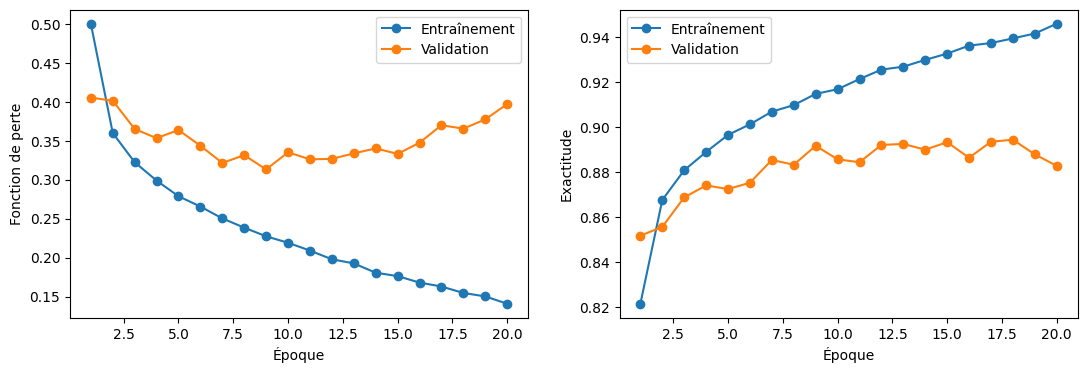

In [32]:
plot_loss_accuracy()

On remarque que le modèle commence à souffrir de surapprentissage : la performance sur le jeu de validation stagne assez vite, tandis qu'elle continue sans cesse de s'améliorer sur le jeu d'entraînement.

Les méthodes `validate_step()` et `test_step()` permettent également d'appeler les méthodes `validate()` et `test()` sur les instances de `Trainer` respectivement.

La méthode `validate()` permet de calculer la fonction de coût et la précision sur le jeu de validation (informations que l'on a déjà ici puisqu'on calcule ces scores à la fin de chaque époque pendant l'entraînement, mais on illustre tout de même son fonctionnement).

In [33]:
trainer.validate(model, dataloader_val)

Validation: |                                                                                                 …

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       accuracy_val        │    0.8827999830245972     │
│         loss_val          │    0.39703044295310974    │
└───────────────────────────┴───────────────────────────┘

[{'loss_val': 0.39703044295310974, 'accuracy_val': 0.8827999830245972}]

De même, la méthode `test()` permet de calculer la fonction de coût et la précision sur le jeu d'évaluation.
Néanmoins, nous n'avons pas de jeu d'évaluation ici, donc nous verrons son utilisation dans d'autres notebooks.
Si on avait une variable `dataloader_test` correspondant au *dataloader* pour le jeu d'évaluation, le code serait le suivant :
```python
trainer.test(model, dataloader_test)
```